In [27]:
import pandas as pd
import requests
import json
import random
import base64

In [2]:
df = pd.read_excel('doctors.xlsx')

In [3]:
df

,Name,image_src,Field,Gender,Address,Maps_link,Area,Experience,Expertise,Other_info
0,Dr. Sheela Chakravarthy,1,physician,female,"154/9, Landmark: Opposite IIM-B, Bangalore","http://www.google.com/maps/place/12.89453,77.5989",Bannerghatta,27,"Internal Medicine, General Physician",Dr. Sheela Chakravarthy is a Internal Medicine...
1,Dr. Raja Selvarajan,2,physician,male,"314/1, 2nd Floor, 3rd Main, 7th Cross, Domlur ...","http://www.google.com/maps/place/12.957568,77....",Domlur,13,Diabetologist General Physician,Dr. Raja Selvarajan an eminent consultant phys...
2,Dr. B Rajasjekar,3,physician,male,"858, 5th Cross, 1st Stage, Landmark: Near KFC ...","http://www.google.com/maps/place/12.9817,77.64125",Indiranagar,23,General Physician Internal Medicine,"Dr. B Rajashekar is a Doctor in Indiranagar, B..."
3,Dr. Sharat Honnatti,4,physician,male,"No 495, 24th Main, 17th Cross, 2nd Sector, HSR...","http://www.google.com/maps/place/12.911892,77....",HSR Layout,16,"Consultant Physician, Internal Medicine, Geria...",Dr. Sharat Honnatti is a Consultant Diabetolog...
4,Dr. Ashok M N,5,physician,male,"111, West of Chord Road, Landmark: OppositeRaj...","http://www.google.com/maps/place/13.002245,77....",Rajajinagar,18,General Physician,"Dr. Ashok M N is a Cardiologist, Diabetologist..."
5,Dr. Fayaz,6,physician,male,"Tirumala complex, 29/1, 5th Cross, RMV 2nd Sta...","http://www.google.com/maps/place/13.042375,77....",Hebbal,29,Pediatrician General Physician General Practit...,Dr. Fayaz is a renowned Paediatrician & Physic...
6,Dr. Pankaj Singhai,7,physician,male,"98, Kodihalli, Landmark: HAL Bus Stop, Bangalore","http://www.google.com/maps/place/12.95959,77.6...",Old Airport Road,17,"Internal Medicin, General Physician",Dr. Pankaj Singhai is a leading General Physic...
7,Dr. Mohan Badagandi,8,physician,male,"98, Kodihalli, Landmark: HAL Bus Stop, Bangalore","http://www.google.com/maps/place/12.95959,77.6...",Old Airport Road,44,General Physician,Dr. Mohan Badgandi a eminent Endocrinologist a...
8,Dr. Shalini Joshi,9,physician,female,"154/9, Landmark: Opposite IIM-B, Bangalore","http://www.google.com/maps/place/12.89453,77.5989",Bannerghatta,15,"Internal Medicine, General Physician",Dr. Shalini Joshi has obtained her MD from wor...
9,Dr. Renu Saraogi,10,physician,female,"74/1, Bellandur Ring Road, Landmark: Near Cent...","http://www.google.com/maps/place/12.926312,77....",Bellandur,20,General Physician,Dr. Renu Saraogi is General & Family Physician...


In [6]:
df.loc[2]["Name"]

'Dr. B Rajasjekar'

In [34]:
for i in range(len(df)):
    mobile = int('9'+''.join([str(random.randint(0,9)) for x in range(9)]))
    email = ''.join(df.loc[i]['Name'].lower().split())[:max(12,len(df.loc[i]['Name']))] + '@gmail.com'
    with open("../images/"+str(df.loc[i]['image_src'])+".jpg", "rb") as image_file:
        encoded_string = 'data:image/jpeg;base64,'+base64.b64encode(image_file.read()).decode('utf-8')
    
    temp = {
        'name' : df.loc[i]['Name'],
        'mobile' : mobile,
        'email' : email,
        'image' : encoded_string,
        'field' : df.loc[i]['Field'],
        'gender' : df.loc[i]['Gender'],
        'address' : df.loc[i]['Address'],
        'maps_link' : df.loc[i]['Maps_link'],
        'area' : df.loc[i]['Area'],
        'experience' : int(df.loc[i]['Experience']),
        'expertise' : df.loc[i]['Expertise'],
        'other_info': df.loc[i]['Other_info']
    }
    r = requests.post('http://localhost:9200/doctor/doctor',data=json.dumps(temp),headers={'Content-Type':'application/json'},timeout=10)
    print(r.json())

TypeError: can only concatenate str (not "bytes") to str

In [23]:
random.randint(1,4)


1



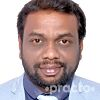

In [40]:
with open("../images/2.jpg", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
print('data:image/jpeg;base64,'+encoded_string)

In [38]:
print(encoded_string)

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCABkAGQDASIAAhEBAxEB/8QAHQAAAgMBAQEBAQAAAAAAAAAAAAYFBwgEAwIBCf/EADsQAAIBAwIDBQYEBQIHAAAAAAECAwAEEQUhBhIxBxNBUWEUInGBkaEIMkKxIzNSwfDR4RVicoKiwvH/xAAZAQACAwEAAAAAAAAAAAAAAAABAwACBAX/xAAhEQACAgICAgMBAAAAAAAAAAAAAQIRAyEEMRIiEzJRQf/aAAwDAQACEQMRAD8A1TRRRUIfM0iQxPLM6xxopZnY4CgdST4Cs19oHazf689zZaPI9jpyEj+E2ZJ16bkdAfIeuSamPxH9oDWuOFtLK94/K13JzbgdQv7E/KqA4d07UNZu5O4gkRYzu5H7ehoNpK2OxY3J67P3UxfNKZrhWZeXCBWz1IyfTbNecFxbw2oUsxVsEnO5xT3pXBdzkLcyOVOcqdyc1IP2aWkrd57MzSKOlZJ8iKejoQ4k69isob61nnQOI0TLMOdhsB038f8A7XO0MzWxXSpueAAs8h2DY6kenr0q0puzBLmB+8RoPDY4bH9qW9S7PLiytZYUX2hWH6gSP3q0OVF6ZSfDmtx2I+j8SeyanGom6YXmVslmwehHStCdlvbPfR6pFo3EZSaz7wRR3kz4kQE45mbowHrg+tZ2HA2q22oFjGyxkk5iG4+VfOqDVNLu2MqlBF/FQ8ueZN9vufr8KfGal0zJPFKP2R/RpSGUMpBUjII8a/apX8MnHrcU8NyaXdOWuLBQYixyxi6Y/wC04GfIjyq6quIaoKKKKg